# Dermatology Disease Classifier

**Background**: Erythemato-Squamous diseases are 6 common skin diseases that 
share similar clinical features of scaling and erythem. These diseases also 
share many histopathological features as well, meaning a sole biopsy won't be 
enough. This poses a significant problem for dermatologists, requiring 
significant effort and time for diagnosis.

The 6 diseases are classified using the below numbering system: 
| Class # | Disease Name |
|:-------------:|:-------------:|
| 1 | Psoriasis|
| 2 | Seborrheic Dermatitis |
| 3 | Lichen Planus |
| 4 | Pityriasis Rosea |
| 5 | Chronic Dermatitis |
| 6 | Pityriasis Rubra Pilaris |

**Objective**: Diagnose which type of erythemato-squamous disease a patient has
based on data from their skin sample

**Note:** All of the features in the dataset, except for age, are categorical data, as symptoms
are quantified on a severity scale between 1-4. 

In this notebook, I analyzed 12 clinical features and 22 histopathological 
feature data from past patient skin samples to build a model using ___  that can
determine which skin disease a new patient had.

In [152]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [113]:
# Load and Get an Overview of the Data
df = pd.read_csv('dermatology_data.csv')

## Exploratory Data Analysis

**Goal:** Analyze and summarize the main characteristics of this dataset

In [114]:
# Allow all columns to be displayed
pd.set_option('display.max_columns', None)

In [115]:
# Check the Shape of the Dataset
print(f"Dimensions of Dataset: {df.shape}")

Dimensions of Dataset: (366, 35)


In [116]:
# View some of the Dataset
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_infiltrate,PNL_infiltrate,fibrosis_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_rete_ridges,elongation_rete_ridges,thinning_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


In [117]:
# Check the Datatypes and Non-Null Counts of each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

Takeaways from Above:
- There aren't many rows in this dataset, as there are only 366 cases.
- Age should be type int64, not object.

In [118]:
# Rename Columns to increase Readibility
df.columns = [" ".join(word.capitalize() for word in column.replace('_', ' ') \
                       .split()) for column in df.columns]

In [119]:
# Convert Age to Numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [120]:
# Check for Missing Values
print(f"# of Missing Values: {df.isnull().sum().sum()}")
df.isnull().sum()

# of Missing Values: 8


Erythema                               0
Scaling                                0
Definite Borders                       0
Itching                                0
Koebner Phenomenon                     0
Polygonal Papules                      0
Follicular Papules                     0
Oral Mucosal Involvement               0
Knee And Elbow Involvement             0
Scalp Involvement                      0
Family History                         0
Melanin Incontinence                   0
Eosinophils Infiltrate                 0
Pnl Infiltrate                         0
Fibrosis Papillary Dermis              0
Exocytosis                             0
Acanthosis                             0
Hyperkeratosis                         0
Parakeratosis                          0
Clubbing Rete Ridges                   0
Elongation Rete Ridges                 0
Thinning Suprapapillary Epidermis      0
Spongiform Pustule                     0
Munro Microabcess                      0
Focal Hypergranu

Takeaways from Above:
- There are only 8 missing values, which are all in age
- Since 8 is a relatively minor amount of data compared to the size of our 
dataset, deleting those rows is a logical way to handle it

In [121]:
# Drop rows with missing values
df.dropna(inplace=True)

In [122]:
# View Updated Data
df.head()

,Erythema,Scaling,Definite Borders,Itching,Koebner Phenomenon,Polygonal Papules,Follicular Papules,Oral Mucosal Involvement,Knee And Elbow Involvement,Scalp Involvement,Family History,Melanin Incontinence,Eosinophils Infiltrate,Pnl Infiltrate,Fibrosis Papillary Dermis,Exocytosis,Acanthosis,Hyperkeratosis,Parakeratosis,Clubbing Rete Ridges,Elongation Rete Ridges,Thinning Suprapapillary Epidermis,Spongiform Pustule,Munro Microabcess,Focal Hypergranulosis,Disappearance Granular Layer,Vacuolisation Damage Basal Layer,Spongiosis,Saw Tooth Appearance Retes,Follicular Horn Plug,Perifollicular Parakeratosis,Inflammatory Mononuclear Infiltrate,Band Like Infiltrate,Age,Class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45.0,3


### Analysis of Target Variable

The goal of this section is to analyze the distribution of the target variable,
`class`, both normalized and in respect to the size of the dataset. This will 
allow me to see any imbalances in the data. To do so, I will visualize the count
and percentages of each class through a bar and pie chart, respectively.

In [123]:
# Helper Function to Add Labels to Bars in Bar Charts
def add_labels(axes, num):
    for p in axes[num].patches:
        axes[num].annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()/3), 
            ha = 'center', 
            va = 'center', 
            xytext = (0, 9), textcoords = 'offset points'
        )

In [124]:
# Dictionary of Class # to the Formal Skin Disease Name
class_dict = {
    1: "1: Psoriasis",
    2: "2: Seborrheic Dermatitis",
    3: "3: Lichen Planus",
    4: "4: Pityriasis Rosea",
    5: "5: Chronic Dermatitis",
    6: "6: Pityriasis Rubra Pilaris"
}

/var/folders/dc/pm6gr_4902x4x99l_wg9mhs80000gn/T/ipykernel_12656/936530524.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(class_dict.values())


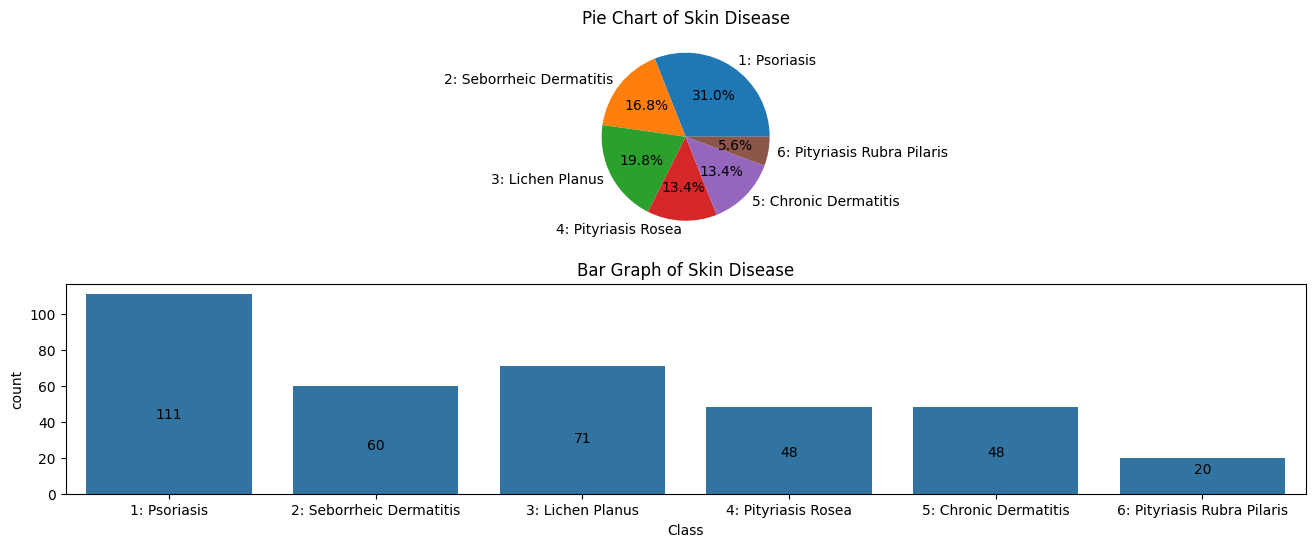

In [125]:
# Figure #1: Pie Chart of Target Variable
counts = df['Class'].value_counts().sort_index()
fig, axes = plt.subplots(2, 1, figsize=(16, 6))
axes[0].pie(x=counts, labels=counts.index.map(class_dict), autopct='%1.1f%%')
axes[0].set_title('Pie Chart of Skin Disease')

# Figure #2: Bar Chart of Target Variable
sns.countplot(x='Class', data=df, ax=axes[1])
add_labels(axes, 1)
axes[1].set_title('Bar Graph of Skin Disease')
axes[1].set_xticklabels(class_dict.values())
plt.show()

Inferences from Above:
- The data imbalance between the most and least common diseases in our dataset, 
`1: Psoriasis` and  `6: Pityriasis Rubra Pilaris` respectively, is significant 
(91 sample difference, more than 1/4 of the dataset).
- The remaining classes are near balanced, with a max 23 sample difference.

### Analysis of Features

The goal of this section is to analyze the distribution of all of the patient's
features and see how disease class percentages change based off of that feature.

This section is later broken down into 2 sub-sections, `Categorical` and 
`Numerical`, where we analyze the 2 types of variables.

We'll start off by looking at correlations between the features through a heat
map and a top correlation list to see which features are highly correlated 
together. This will be useful later when we dimension reduction and open the door
for algorithms that have problems with high-colinearity.

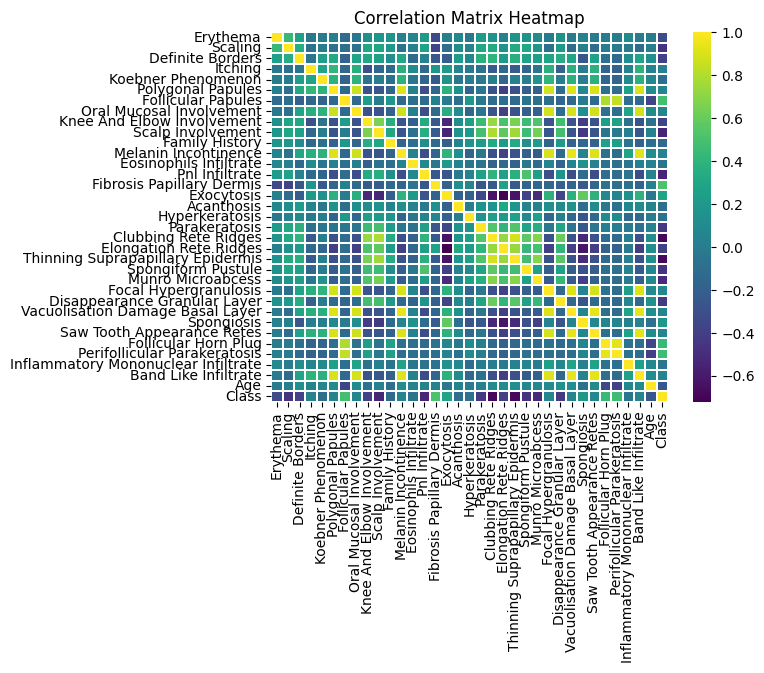

In [126]:
# Create the Heatmap of Correlations
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=False, cmap='viridis', fmt='.1%',
            linewidths=0.003,
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.index)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [127]:
# Retrieve DataFrame of Correlations with a Threshold of 0.9
corr_unstacked = corr_matrix.unstack()
top_corr = corr_unstacked.reindex(corr_unstacked.abs().sort_values(\
    ascending=False).index)
top_corr = top_corr[(0.9 <= corr_unstacked) & (corr_unstacked != 1)].reset_index()
top_corr.columns = ['Row', 'Column', 'Abs. Correlation']
top_corr

,Row,Column,Abs. Correlation
0,Vacuolisation Damage Basal Layer,Melanin Incontinence,0.942366
1,Melanin Incontinence,Vacuolisation Damage Basal Layer,0.942366
2,Vacuolisation Damage Basal Layer,Saw Tooth Appearance Retes,0.937678
3,Saw Tooth Appearance Retes,Vacuolisation Damage Basal Layer,0.937678
4,Band Like Infiltrate,Vacuolisation Damage Basal Layer,0.937120
5,Vacuolisation Damage Basal Layer,Band Like Infiltrate,0.937120
6,Perifollicular Parakeratosis,Follicular Horn Plug,0.928843
7,Follicular Horn Plug,Perifollicular Parakeratosis,0.928843
8,Band Like Infiltrate,Saw Tooth Appearance Retes,0.928171
9,Saw Tooth Appearance Retes,Band Like Infiltrate,0.928171


Takeaways from the Heat Map and Correlation Table:
- Many features have high correlations. This makes sense logically, as diseases 
usually come with a set group of symptoms.
- The group of symptoms with the highest correlations are `Polygonal Papules`, 
`Oral Mucosal Involvement`, `Melanin Incontinence`, `Focal Hypergranulosis`, 
`Vacuolisation Damage Basal Layer`, `Saw Tooth Appearance Retes`, and 
`Band Like Infiltrate`, with all of the top correlations >= 0.9 being from this
group.

#### Categorical Variables

This section analyzes the distribution of all of the categorical variables, 
which are all patient symptoms measured based on severity. There are 33 symptoms
in this dataset.

I'll see how disease class percentage 
changes based off of severity by visualizing the count of each severity and 
percentages of each class given a severity through a pie chart and a heat map 
respectively.  This will help me detect imbalances in the dataset and see any 
patterns with the target variable, the disease class #.

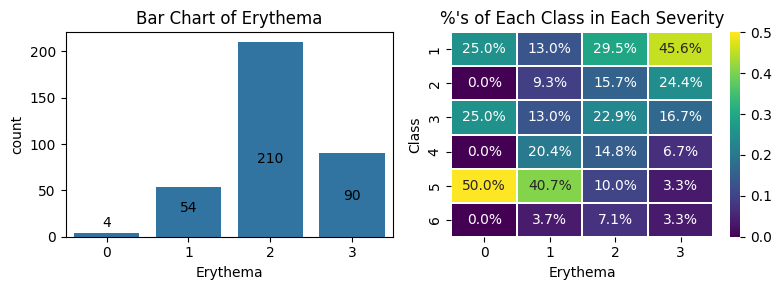

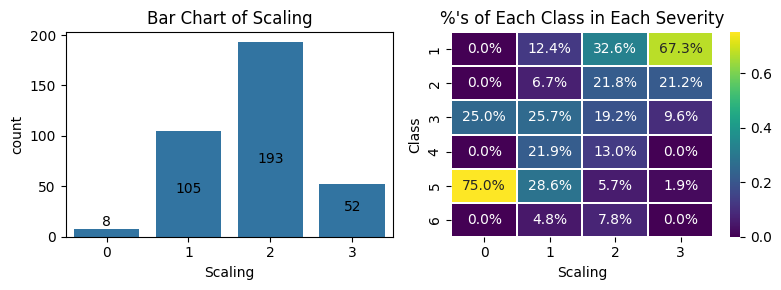

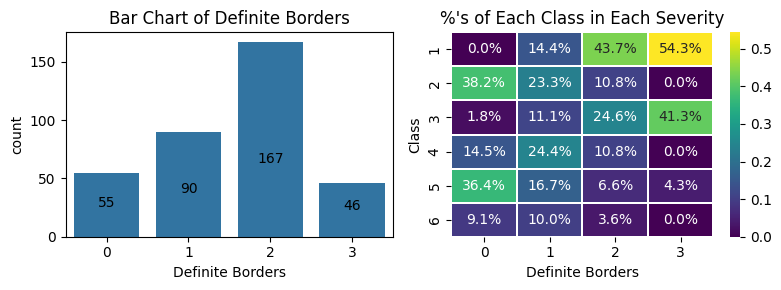

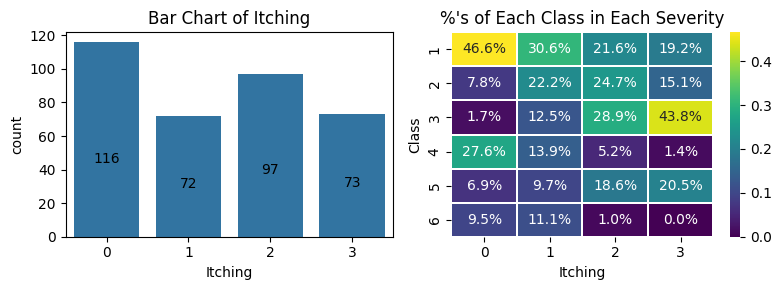

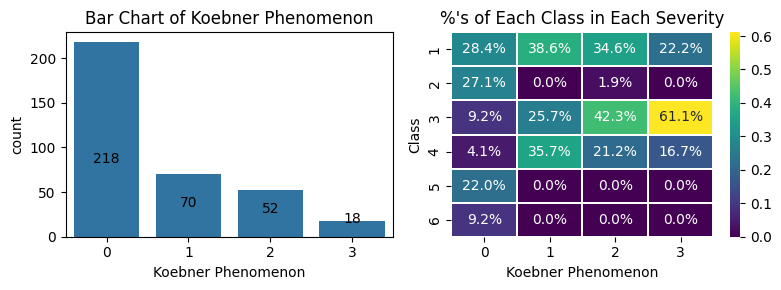

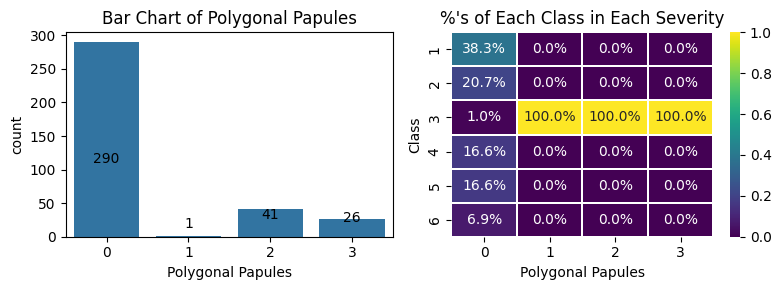

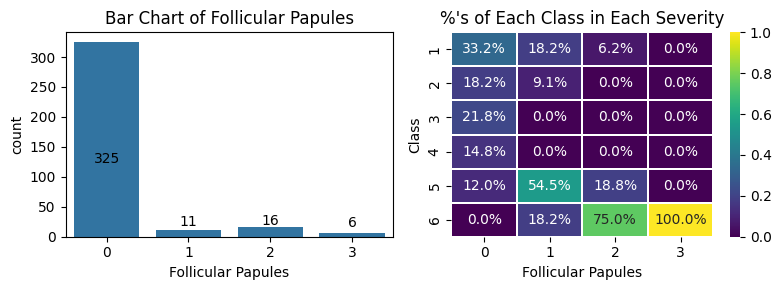

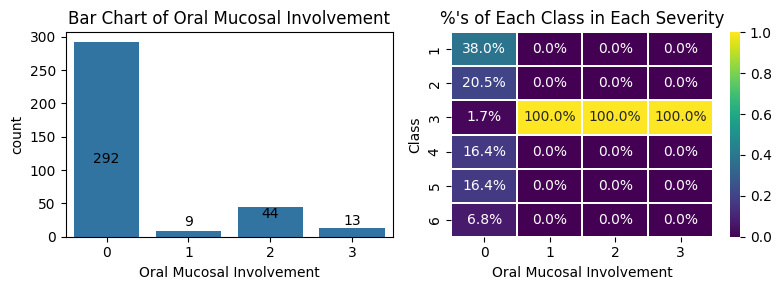

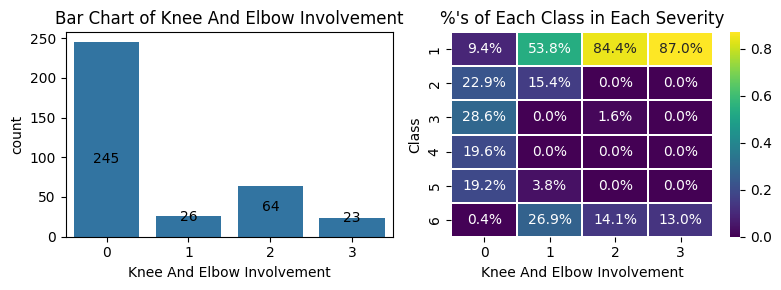

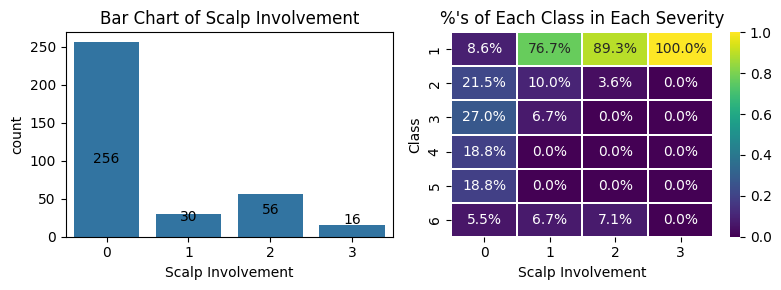

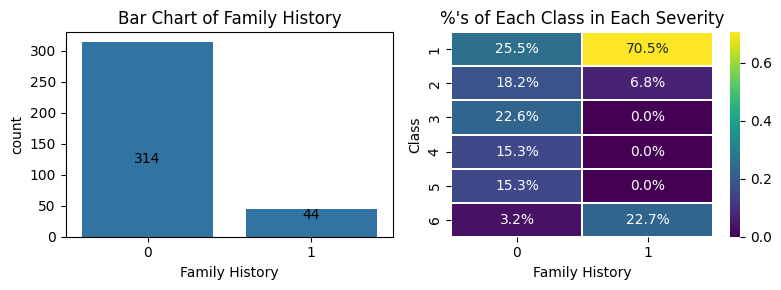

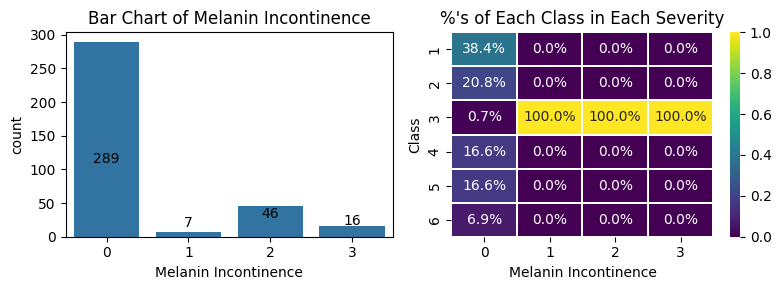

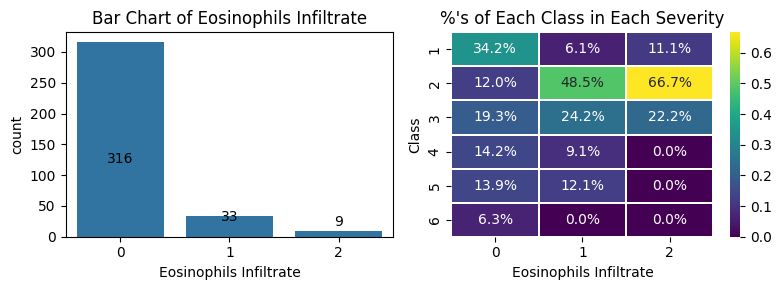

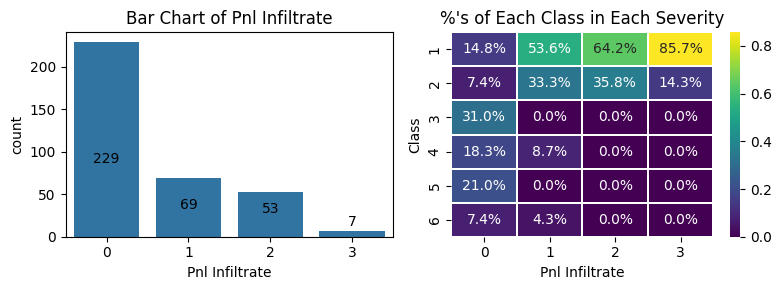

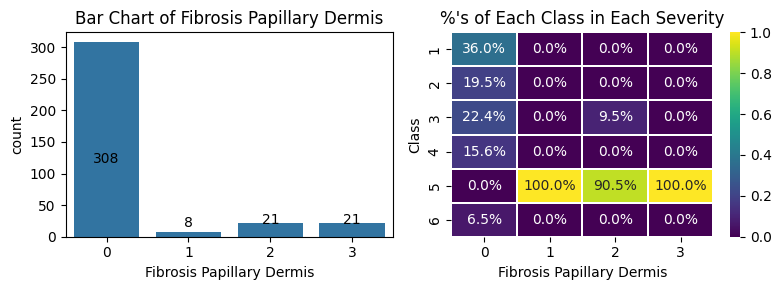

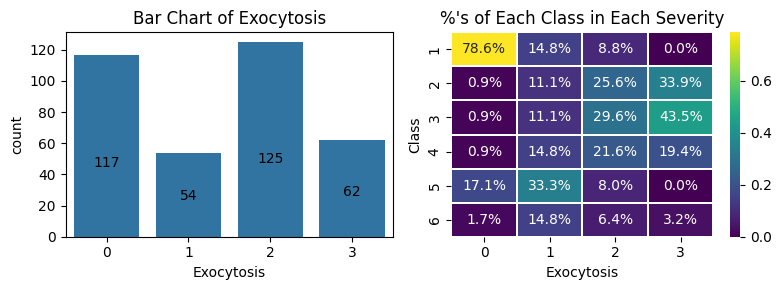

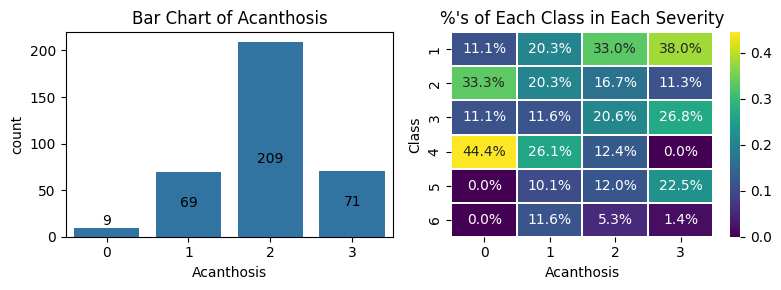

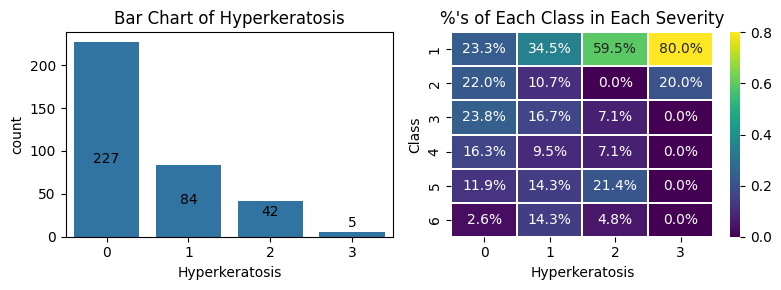

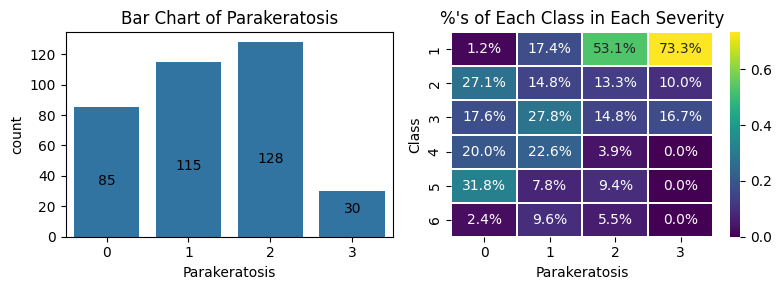

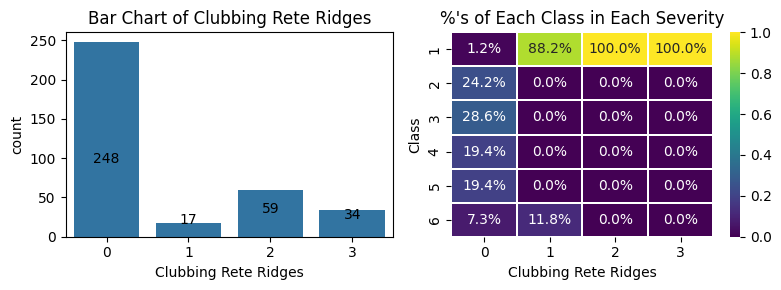

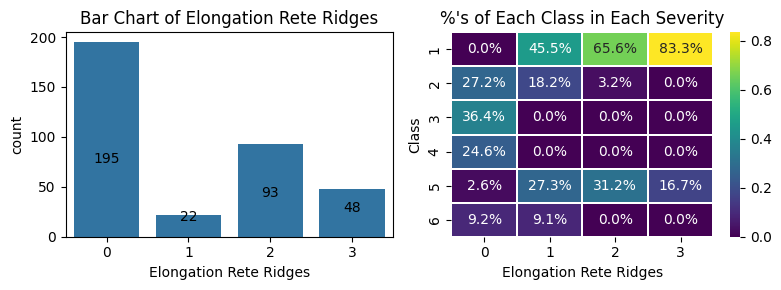

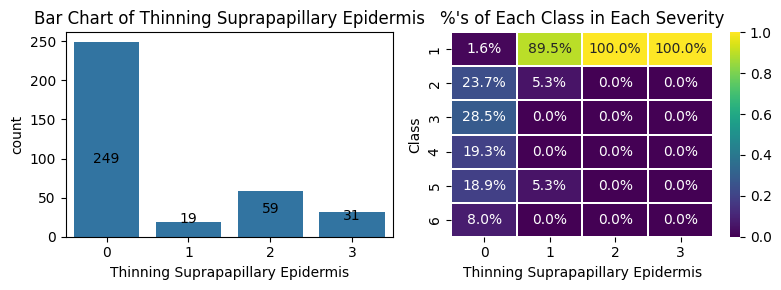

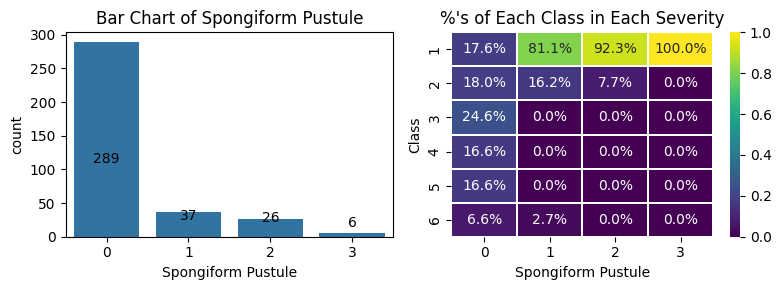

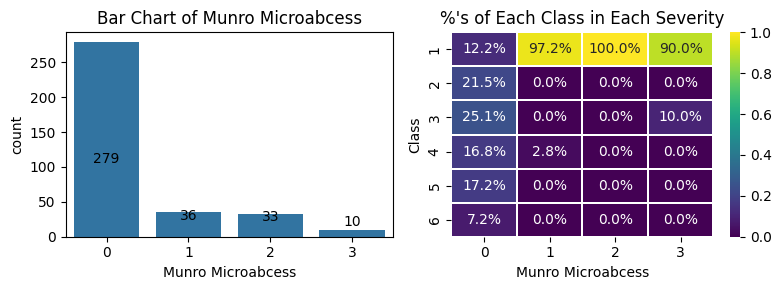

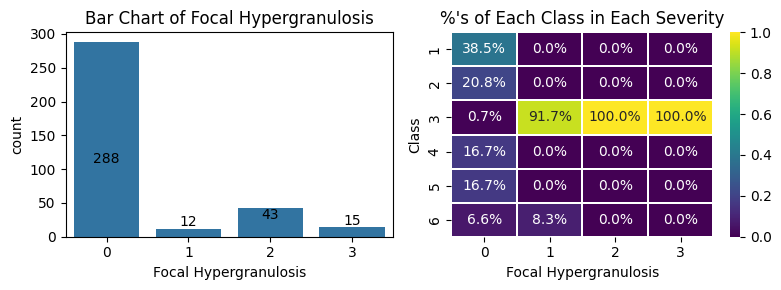

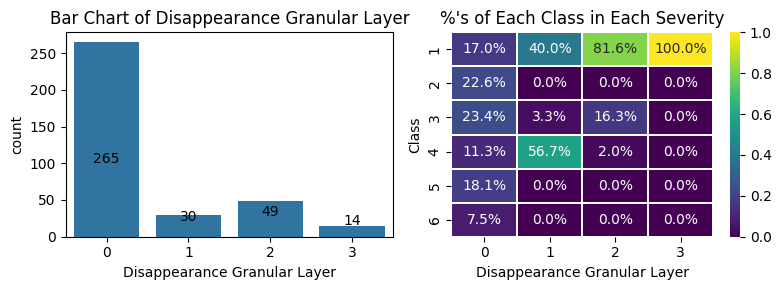

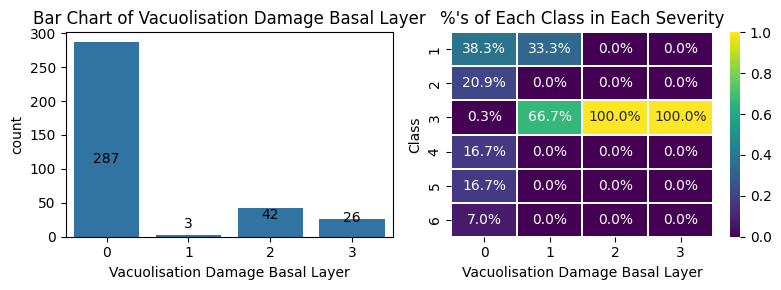

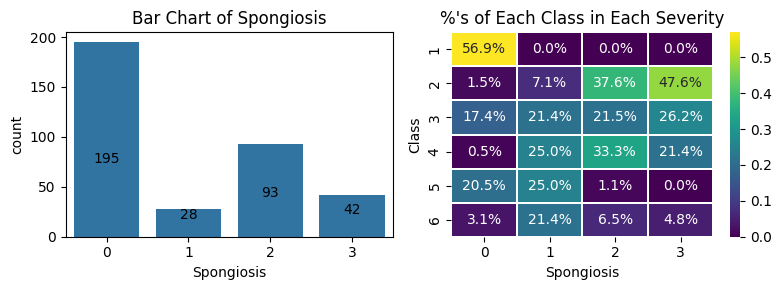

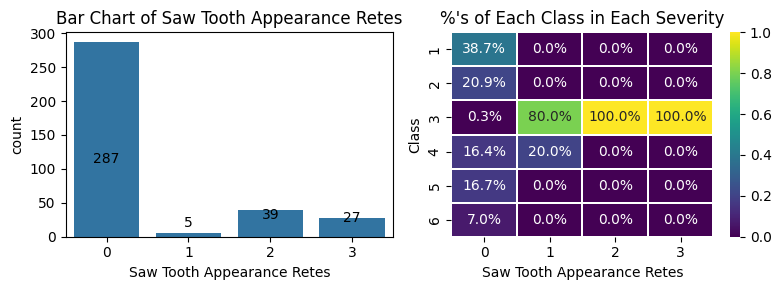

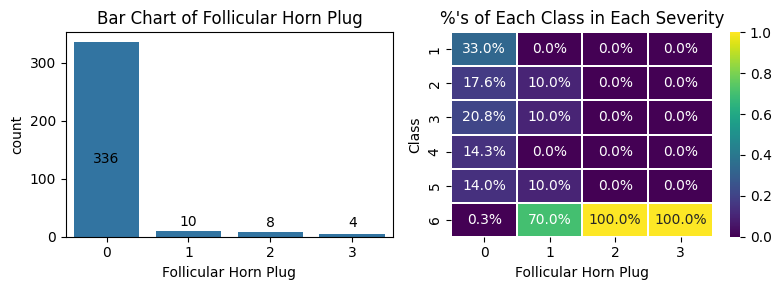

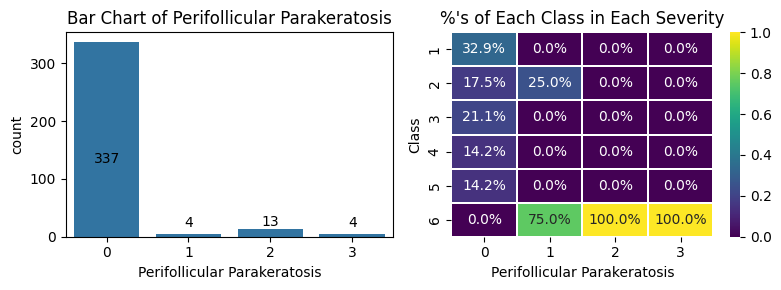

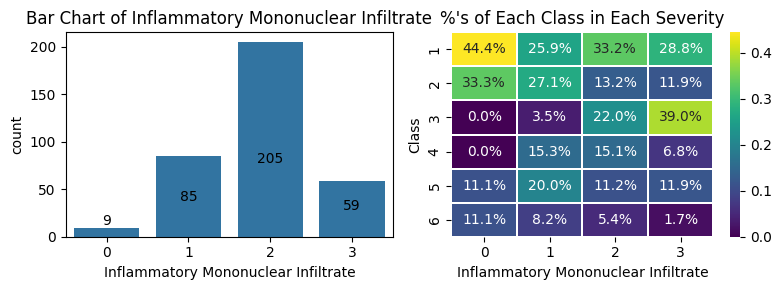

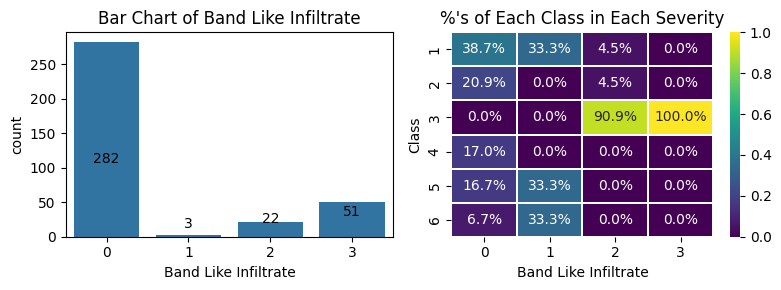

In [128]:
# Create Data Visualizations for each Symptom
for column in df.columns[:-2]: # Excludes Age and Class 
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3))
    percentage_df = df.groupby(column)['Class'].value_counts(normalize=True)\
        .unstack().fillna(0)

    # Figure #1: Bar Chart of Symptom Severity Counts 
    sns.countplot(data=df, x=column, ax=axes[0])
    axes[0].set_title(f'Bar Chart of {column}')
    add_labels(axes, 0)

    # Figure #2: Heat Map of Percentages of Each Class in Each Severity
    sns.heatmap(percentage_df.transpose(), annot=True, cmap='viridis',
                linewidths=0.003, fmt='.1%', ax=axes[1])
    axes[1].set_title(f'%\'s of Each Class in Each Severity')

    plt.tight_layout()
    plt.show()



Takeaways from Above:
- All of the symptoms are skewed in some direction, with most of the symptoms 
skewing right. 
  - Signs of high severities of those symptoms are typically indications of one
  class.
  - **Example:** The group of symptoms that have high correlation mentioned 
  above are positively correlated with disease class `3: Lichen Planus`.
- The remaining symptoms aren't as indicative of disease class but still helps 
narrow down which disease class the patient could be.

#### Analysis of Numerical Variables

In this  section, I'm looking into the only numerical variable in this 
dataset, `age`, by analyzing the distribution of age groups and how skin 
disease class varies based on age group in our dataset.

I'll start by seeing the distibution of `age` by retrieving the summary 
statistics and creating a histogram and box-plot.

In [129]:
# Print Summary Statistics
df['Age'].describe()

count    358.000000
mean      36.296089
std       15.324557
min        0.000000
25%       25.000000
50%       35.000000
75%       49.750000
max       75.000000
Name: Age, dtype: float64

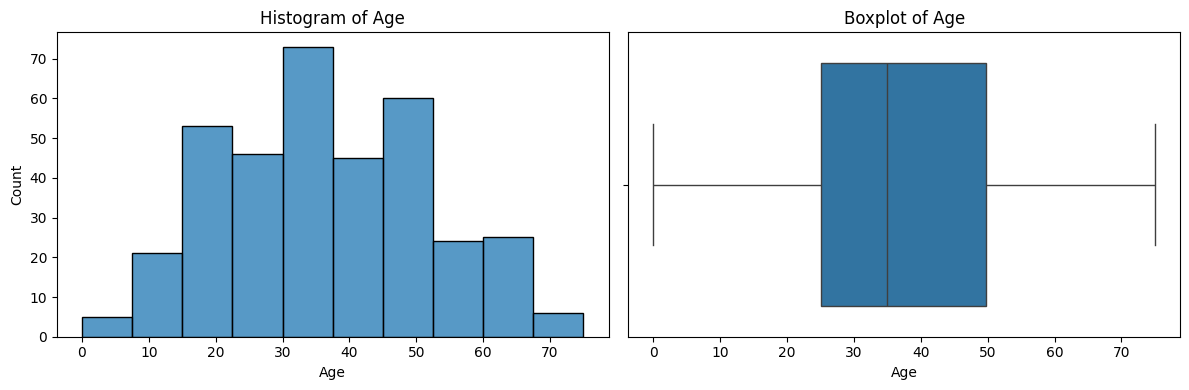

In [130]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Figure #1: Histogram of Age
sns.histplot(data=df, x='Age', bins=10, ax=axes[0])
axes[0].set_title(f'Histogram of Age')

# Figure #2: Boxplot of Age
sns.boxplot(data=df,x='Age', ax=axes[1])
axes[1].set_title(f'Boxplot of Age')

plt.tight_layout()
plt.show()

Takeaways from Above:
- Since the mean is close to the median, age is approximately symmetric
- Most participants are middle-aged, between 25 and 49.75 years old
- No apparent outlier based off of age

Next, I'm going to examine how the percentages of skin disease class shift based
on age group. The age groups are the same ones as the histogram. This will give
me insight on dependencies and relationships between age and particular skin 
diseases.

/var/folders/dc/pm6gr_4902x4x99l_wg9mhs80000gn/T/ipykernel_12656/463998339.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_df = df.groupby(pd.cut(df['Age'], bins=bins))['Class']


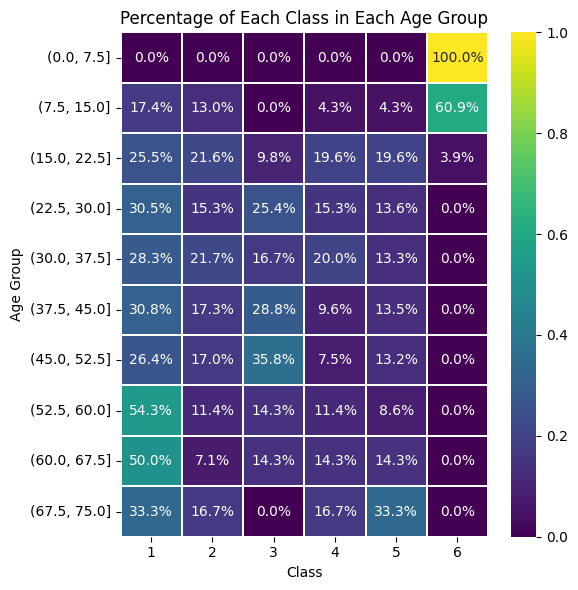

In [131]:
# Calculate Percentages of Class in each Age Group
bins = np.linspace(df['Age'].min(), df['Age'].max(), 11)
percentage_df = df.groupby(pd.cut(df['Age'], bins=bins))['Class']
percentage_df = percentage_df.value_counts(normalize=True).unstack().fillna(0)

# Heatmap of Percentage of Each Class in Each Age Group
plt.figure(figsize=(6, 6))
sns.heatmap(percentage_df, annot=True, cmap='viridis', linewidths=0.003, fmt='.1%')
plt.xlabel('Class')
plt.ylabel('Age Group')
plt.title('Percentage of Each Class in Each Age Group')
plt.tight_layout()
plt.show()

Takeaways from Above:
- Skin disease class `1: Psoriasis` is the most common skin disease for older 
people (> 50 years)
- Skin disease class `6: Pityriasis Rubra Pilaris` is common for kids and teens.
- The remaining skin disease classes are relatively uniform.

## Data Preprocessing

The goal of this section is to create features and preprocess the data so the 
future model won't be subject to bias that was in the dataset beforehand.

### Feature Engineering

In reality, diseases usually present with a group of symptoms of varying 
severities. A cough will bring far fewer severe symptoms compared to cancer. 
I want to see if this is the case in this project. To do so, I will capture the
counts of each severity level for each patient and see if it correlates with the
type of skin disease they have using a heatmap visualization. I will also 
use a count plot to see how it's distributed

In [132]:
# Compute counts of each severity and add to dataframe
symptoms = df.columns[:-2]
for severity in range(4):
    df[f'Severity {severity}'] = (df[symptoms] == severity).sum(axis=1)
df.head()

,Erythema,Scaling,Definite Borders,Itching,Koebner Phenomenon,Polygonal Papules,Follicular Papules,Oral Mucosal Involvement,Knee And Elbow Involvement,Scalp Involvement,Family History,Melanin Incontinence,Eosinophils Infiltrate,Pnl Infiltrate,Fibrosis Papillary Dermis,Exocytosis,Acanthosis,Hyperkeratosis,Parakeratosis,Clubbing Rete Ridges,Elongation Rete Ridges,Thinning Suprapapillary Epidermis,Spongiform Pustule,Munro Microabcess,Focal Hypergranulosis,Disappearance Granular Layer,Vacuolisation Damage Basal Layer,Spongiosis,Saw Tooth Appearance Retes,Follicular Horn Plug,Perifollicular Parakeratosis,Inflammatory Mononuclear Infiltrate,Band Like Infiltrate,Age,Class,Severity 0,Severity 1,Severity 2,Severity 3
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55.0,2,25,2,3,3
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8.0,1,15,8,7,3
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26.0,3,16,4,8,5
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40.0,1,19,0,9,5
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45.0,3,16,2,11,4


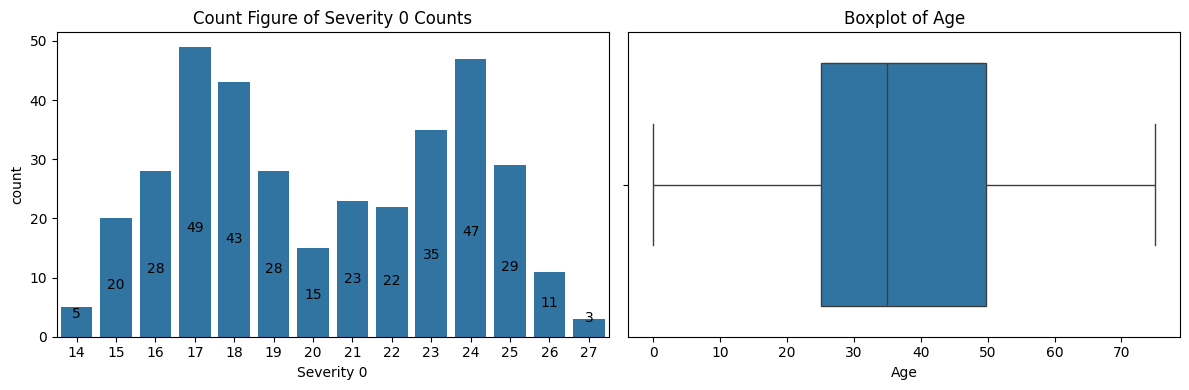

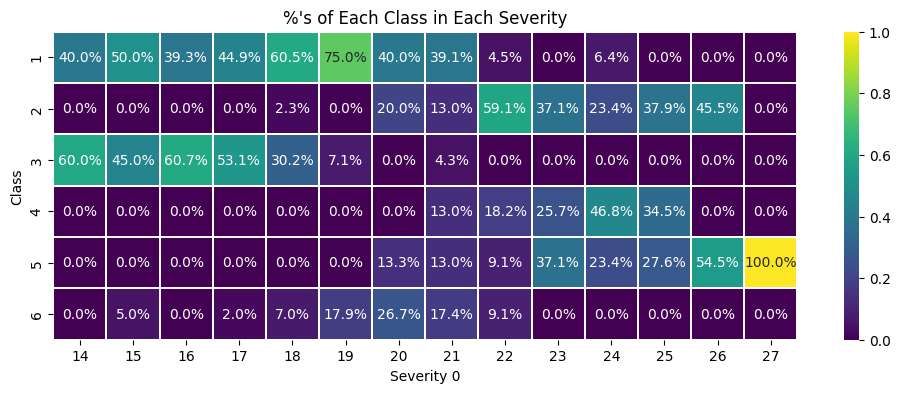

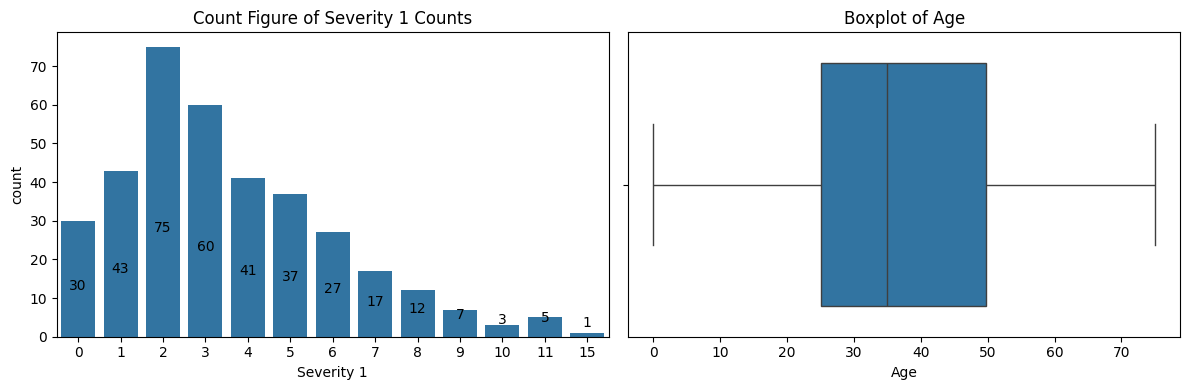

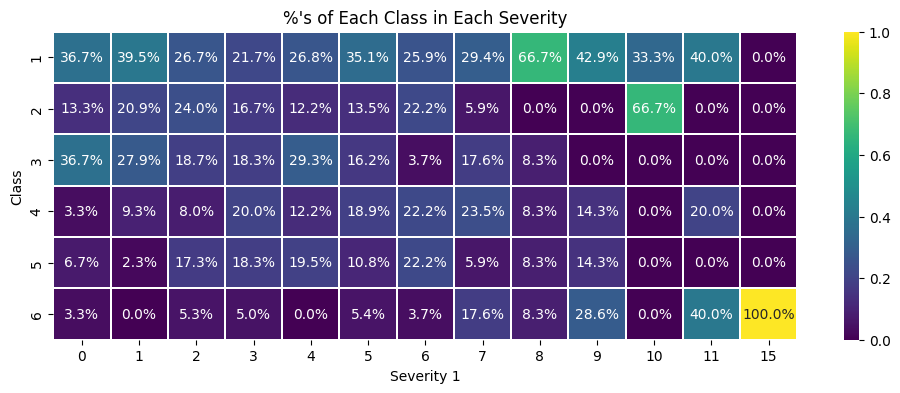

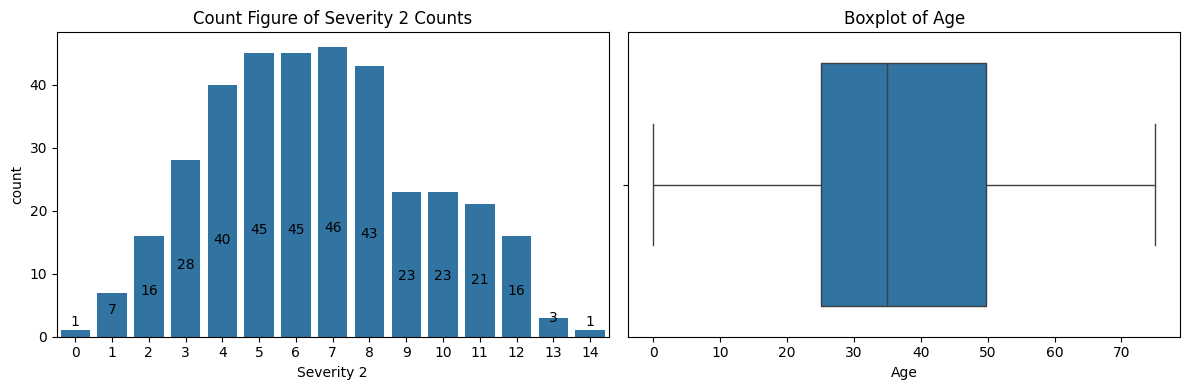

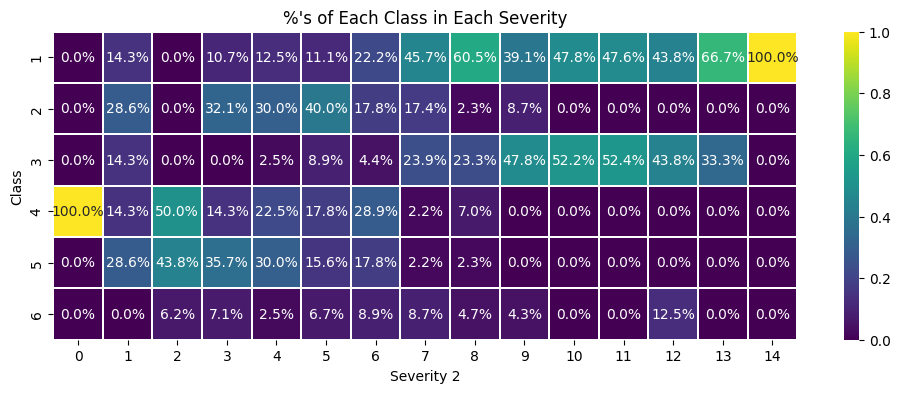

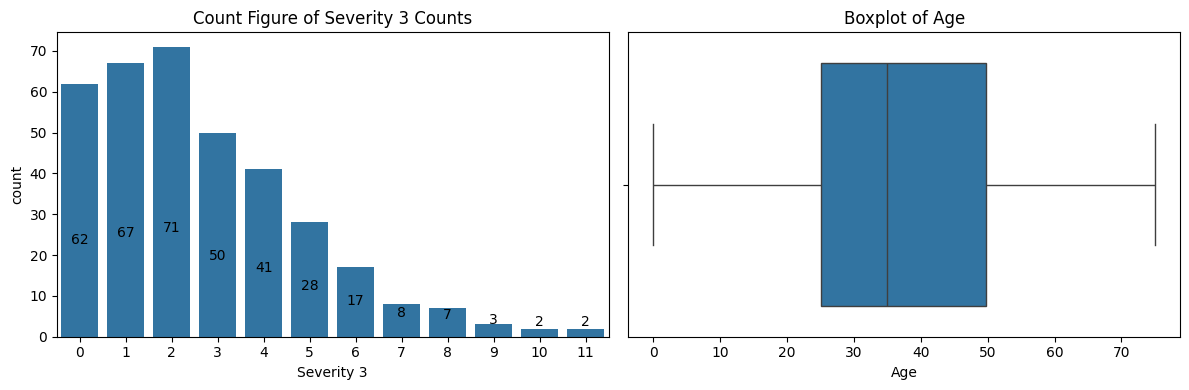

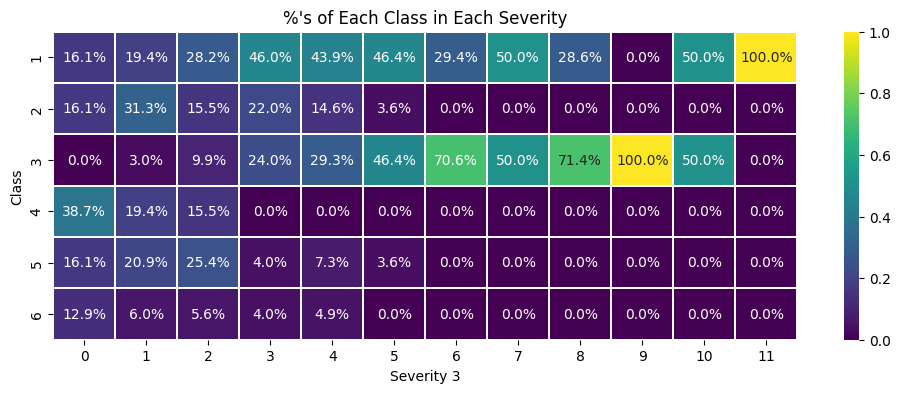

In [135]:
# Create Visualizations
for severity in range(4):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Figure #1: Count Figure of Severity Counts
    sns.countplot(data=df, x=f'Severity {severity}', ax=axes[0])
    axes[0].set_title(f'Count Figure of Severity {severity} Counts')
    add_labels(axes, 0)

    # Figure #2: Boxplot of Age
    sns.boxplot(data=df,x='Age', ax=axes[1])
    axes[1].set_title(f'Boxplot of Age')

    plt.tight_layout()
    plt.show()

    # Figure #3: Heatmap of the impact of severity counts with disease class
    percentage_df = df.groupby(f'Severity {severity}')['Class']\
        .value_counts(normalize=True).unstack().fillna(0)
    plt.figure(figsize=(12,4))
    sns.heatmap(percentage_df.transpose(), annot=True, cmap='viridis',
                linewidths=0.003,
                fmt='.1%')
    plt.title(f'%\'s of Each Class in Each Severity')
    plt.show()

Takeaways from Above
- Skin Disease Class `1: Psoriasis` and `3 Lichen Planus` seem to be very 
common for patients with high counts of severity 2s and 3s and less common with
patients with high counts of severity 0s and 1s.
- These features seem to provide new additional information into predicting
skin disease class.

### Dealing with Data Imbalance

The target variable, `class`, has major data imbalance  between the most and 
least common diseases in our dataset, `1: Psoriasis` and `6: Pityriasis Rubra Pilaris`
respectively, is significant (91 sample difference, more than 1/4 of the
dataset). To address this, I will apply SMOTE to synthetically produce patient
data for the skin disease 2-6 to match the same count of skin disease 1.

## Training and Testing Models

The goal of this section is to find what type of model performs the best in
predicting patient's skin disease based on their symptoms and other features. 
However, the data isn't split up into training and testing dataset, so we have 
to split that up first.

In [137]:
# Seperate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

In [138]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Softmax Logistic Regression

The first type of model I am testing is Softmax logistic regression. For the 
assumptions, each patient's data is independent to all other patients but there
are several variables that are highly correlated to each other, causing 
multicollinearity. 

However, I'll still check out this type of model to see any patterns.

In [144]:
# Initialize and train the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [145]:
# Make predictions
y_pred = model.predict(X_test)

array([5, 4, 4, 1, 6, 1, 4, 1, 3, 5, 1, 4, 3, 1, 1, 1, 1, 3, 3, 4, 3, 1,
       1, 2, 6, 5, 1, 4, 1, 1, 1, 4, 5, 1, 3, 4, 5, 1, 1, 3, 2, 1, 3, 5,
       4, 1, 2, 2, 3, 2, 2, 5, 3, 2, 3, 5, 1, 2, 1, 3, 4, 3, 3, 2, 2, 1,
       5, 5, 2, 5, 2, 5])

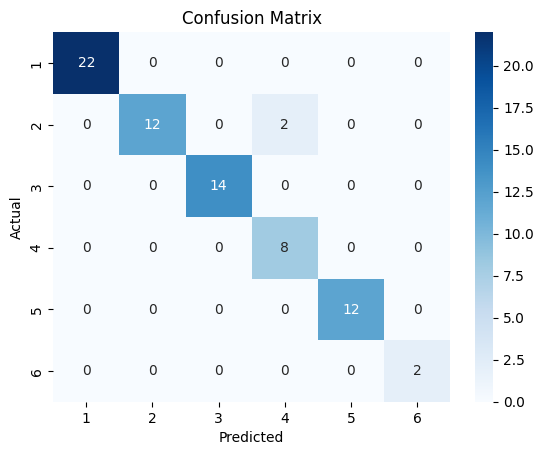

In [149]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [153]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision per class: {precision_score(y_test, y_pred, average=None)}")

Accuracy: 0.9722222222222222
Precision per class: [1.  1.  1.  0.8 1.  1. ]


Takeaways from Above
- The softmax regression model did extremely well, with over 97% accuracy. The
only two misses come from predicting class 2 when it should've been class 4.